In [1]:
!pip install tensorflow==2.3.0 keras==2.4.3 adversarial-robustness-toolbox==1.4.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.3.0


In [2]:
!pip uninstall tensorflow keras

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.9.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.9.1
Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.9.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-2.9.0


In [5]:
!pip install tensorflow==2.8.0 keras==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.8.0 which is incompatible.


In [6]:
!pip install adversarial-robustness-toolbox==1.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
  Attempting uninstall: adversarial-robustness-toolbox
    Found existing installation: adversarial-robustness-toolbox 1.14.0
    Uninstalling adversarial-robustness-toolbox-1.14.0:
      Successfully uninstalled adversarial-robustness-toolbox-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


In [7]:
import numpy as np
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from art.estimators.classification import KerasClassifier

In [8]:
# Disable eager execution for compatibility
tf.compat.v1.disable_eager_execution()

In [9]:
# Load MNIST dataset
def load_mnist():
    """Load MNIST dataset and preprocess."""
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

    # Normalize data
    train_data = train_data.astype("float32") / 255.0
    test_data = test_data.astype("float32") / 255.0

    # Reshape for Conv2D
    train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
    test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

    return train_data, train_labels, test_data, test_labels

# Build the Keras model
def make_model():
    """Define a CNN model using Keras."""
    model = Sequential([
        Conv2D(16, (8, 8), strides=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (4, 4), strides=2, padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Main code
if __name__ == "__main__":
    # Load data
    train_data, train_labels, test_data, test_labels = load_mnist()

    # Create the model
    model = make_model()
    model.summary()

    # Compile the model
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Wrap the Keras model using ART's KerasClassifier
    classifier = KerasClassifier(model=model, clip_values=(0, 1), use_logits=False)

    # Train the model
    classifier.fit(train_data, train_labels, batch_size=264, nb_epochs=10)

    # Evaluate the model
    accuracy = classifier._model.evaluate(test_data, test_labels)[1]
    print(f"Test accuracy: {accuracy * 100:.2f}%")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        1040      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test accuracy: 96.95%


In [11]:
from art.attacks.inference import model_inversion
from art.estimators.classification import KerasClassifier

In [12]:
# create the attack object
my_attack = model_inversion.MIFace(classifier)

In [13]:
# create an array of the classes to be attacked
y_all = np.arange(10)
y_all

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
inferred_images = my_attack.infer(x=None,y=y_all)

Model inversion:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [15]:
inferred_images.shape

(10, 28, 28, 1)

In [17]:
import matplotlib.pyplot as plt

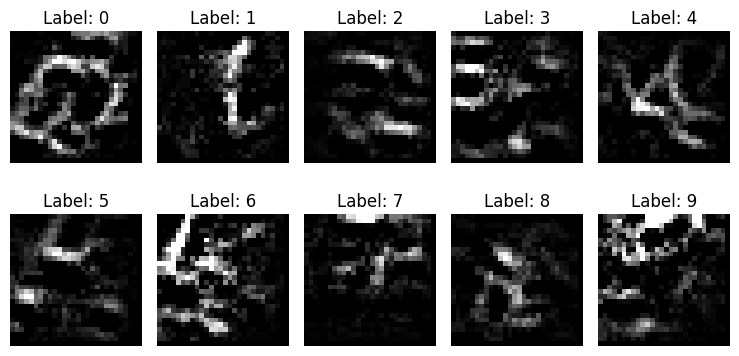

In [18]:
# plot the inverted class representations
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.set_axis_off()
    ax.imshow(inferred_images[i,:,:,:].reshape(28,28), cmap='gray')
    ax.set_title('Label: {}'.format(y_all[i]))

plt.tight_layout()
plt.show()

Reference: https://franziska-boenisch.de/posts/2020/12/model-inversion/